In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from pandas import DataFrame
from tqdm import tqdm

In [2]:
w = np.random.rand(3,2)
x = np.random.rand(3,1)
b = np.random.rand(2,1)

In [3]:
out = w.transpose().dot(x) + b

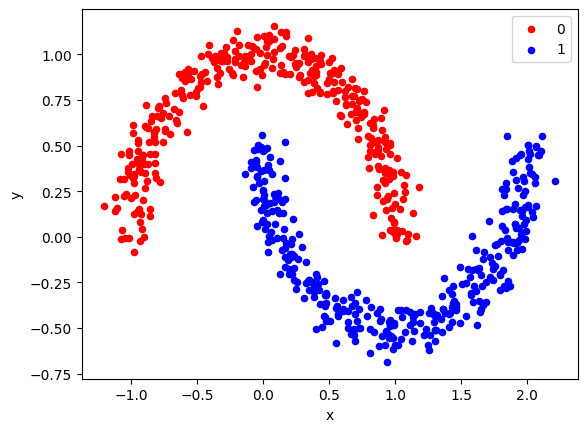

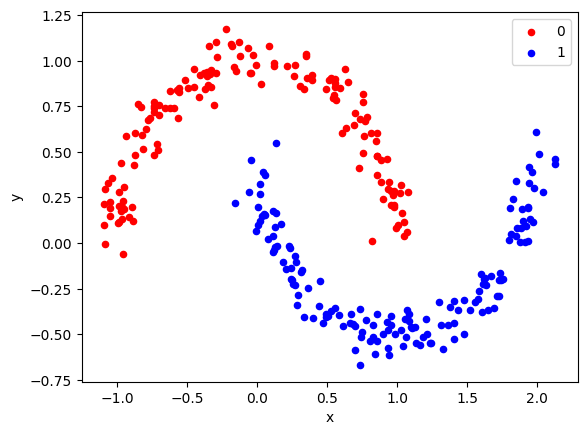

In [4]:
coordinates,labels = make_moons(n_samples=1000, noise=0.07)

x = coordinates[0:700,:]
y = labels[0:700]

x_test = coordinates[700:,:]
y_test = labels[700:]

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


df = DataFrame(dict(x=x_test[:,0], y=x_test[:,1], label=y_test))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [5]:
class mlp_2_layer:
    def __init__(self, inputneurons,layer1Neurons, layer2Neurons, activation1, activation2):
        self.w1 = np.random.rand(inputneurons, layer1Neurons)
        self.b1 = np.zeros((layer1Neurons,1))
        self.w2 = np.random.rand(layer1Neurons, layer2Neurons)
        self.b2 = np.zeros((layer2Neurons,1))
        self.activation1 = activation1
        self.activation2 = activation2
    
    # def sigmoid(self, x, derivative=False):
    #     if derivative==True:
    #         return self.sigmoid(x, False)*(1 - self.sigmoid(x, False))
    #     return 1/(1 + np.exp(-x))
    
    # def tanh(self, x, derivative=False):
    #     if derivative==True:
    #         return 1 - np.square(np.tanh(x))
    #     return  np.tanh(x)
    
    # def activation_func(self,active_func, x, derivative=False):
    #     if active_func=="sigmoid":
    #         return self.sigmoid(x, derivative)
    #     if active_func=="tanh":
    #         return self.tanh(x, derivative)
    #     if active_func=="linear":
    #         if derivative==True:
    #             return 1
    #         return x
    #     else:
    #         raise ValueError("Your activation function is not supported")
            
    def tanh(self,x):
        return np.tanh(x)
    
    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))
    
    def sigmoid_dr(self,x):
        s=1/(1 + np.exp(-x))
        return s*(1-s)
    
    def tanh_dr(self,x):
        t = np.tanh(x)
        return 1 - t**2
    
    
    def activation(self,type_a,x):
        if type_a=="sigmoid":
            return self.sigmoid(x)
        if type_a=="tanh":
            return self.tanh(x)
        if type_a=="linear":
            return x

    def derivative(self,type_a,x):
        if type_a=="sigmoid":
            return self.sigmoid_dr(x)
        if type_a=="tanh":
            return self.tanh_dr(x)
        if type_a=="linear":
            return 1
    
    # def feed_forward(self,x):
    #     z1 = self.w1.transpose().dot(x) + self.b1
    #     a1 = self.activation_func(self.activation1, z1, False)
    #     z2 = self.w2.transpose().dot(a1) + self.b2
    #     a2 = self.activation_func(self.activation1, z2, False)
    #     return z1,a1,z2,a2
    
    def feed_forward(self,x):
        z1 = self.w1.transpose().dot(x) + self.b1
        a1 = self.activation(self.activation1,z1)
        z2 = self.w2.transpose().dot(a1) + self.b2
        a2 = self.activation(self.activation2,z2)
        return z1,a1,z2,a2
    
    # def backpropagation(self, z1, a1, z2, a2, x, y):
    #     m = y.size
    #     dz2=(a2-y)*self.activation_func(self.activation2,z2, True)
    #     dw2 = 1/m*dz2.dot(a1.T)
    #     db2 = 1/m*np.sum(dz2,1)
    #     dz1 = self.w2.dot(dz2)*self.activation_func(self.activation1, z1, True)
    #     dw1 = 1/m * dz1.dot(x.T)
    #     db1 = 1/m * np.sum(dz1,1)
    #     return dw1,db1,dw2,db2
    
    # def update(self,dw2,dw1,db2,db1,learning_rate):
    #     self.w1 -= learning_rate*dw1.T
    #     self.w2 -= learning_rate*dw2.T
    #     self.b1 -= learning_rate*np.reshape(db1,(db1.shape[0],1))
    #     self.b2 -= learning_rate*np.reshape(db2,(db2.shape[0],1))



    def backpropagation(self, z1, a1, z2, a2, x, y):
        m = y.size
        dz2=(a2-y)*self.derivative(self.activation2,z2)
        dw2 = dz2.dot(a1.T)
        db2 = np.sum(dz2,1)
        dz1 = self.w2.dot(dz2)*self.derivative(self.activation1,z1)
        dw1 = dz1.dot(x.T)
        db1 = np.sum(dz1,1)
        return dw1,db1,dw2,db2
    
    def update(self,dw2,dw1,db2,db1,learning_rate):
        self.w1 -= learning_rate*dw1.T
        self.w2 -= learning_rate*dw2.T
        self.b1 -= learning_rate*np.reshape(db1,(db1.shape[0],1))
        self.b2 -= learning_rate*np.reshape(db2,(db2.shape[0],1))
    
    # def gradient_descent(self, x, y, iters, EPOCH, learning_rate):
    #     for i in tqdm(range(EPOCH)):
    #         z1,a1,z2,a2 = self.feed_forward(x)
    #         dw1, db1, dw2, db2 = self.backpropagation(z1, a1, z2, a2, x ,y)
    #         self.update(dw2,dw1,db2,db1,learning_rate)
            
    #         if i % iters == 0:
    #             print("Iteration: ",i)
    #             print("loss: ", self.loss(a2,y))
    #             print("Accuracy: ", self.accuracy(self.predict(a2),y))
                
    def gradient_descent_minibatch(self, x, y, iters, EPOCH, learning_rate, threshold=0.001, batchsize=None, lr_decrease = 1):
        batch=x.shape[1]
        loss_list=[]
        epoch_list=[]
        if batchsize!=None and batchsize!=0:
            batch=batchsize
        lr = learning_rate
        for i in tqdm(range(EPOCH)):
            for j in range(0,x.shape[1], batch):
                # print("batch: ",j)
                samples = x[:,j:j+batch]
                z1,a1,z2,a2 = self.feed_forward(samples)
                dw1, db1, dw2, db2 = self.backpropagation(z1, a1, z2, a2, samples ,y[j:j+batch])
                self.update(dw2,dw1,db2,db1,lr)

            if i % iters == 0:
                print("EPOCH: ",i)
                print("loss: ", self.loss(a2,y[j:j+batch]))
                print("Accuracy: ", self.accuracy(self.predict(a2),y[j:j+batch]))
            loss_list.append(self.loss(self.feed_forward(x)[3],y))
            epoch_list.append(i)
            lr = lr_decrease * learning_rate
            if self.loss(self.feed_forward(x)[3],y) < threshold:
                break
            
        return loss_list, epoch_list
    
    def predict(self, x):
        return np.where(x > 0.5, 1, 0)
    
    def loss(self,a2,y):
        return np.square(np.subtract(a2,y)).mean()
    
    def accuracy(self, predictions, y):
        return 100*(np.sum(predictions==y)/y.size)
        

In [6]:
def decision_boundary(X,mlp,y):
    # h=0.01
    # x_min,x_max = x[:,0].min()-1,x[:,0].max()+1
    # y_min,y_max = x[:,1].min()-1,x[:,1].max()+1
    # xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    # z=[]
    # d=np.c_[xx.ravel(),yy.ravel()]
    # for j in range(len(d)):
    #     z.append(network.predict(d[j]))
    # z=np.array(z)
    # print(len(np.c_[xx.ravel(),yy.ravel()]))
    # z=z.reshape(yy.shape)
    # plt.contourf(xx,yy,z,cmap=plt.cm.Paired)
    # plt.axis('off')
    # plt.scatter(x[:,0],x[:,1],color='red')
    # plt.show()
    # plt.savefig('flb_dc.png')
    
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)
    Z = mlp.predict(mlp.predict(mlp.feed_forward(np.c_[xx.ravel(), yy.ravel()].transpose())[3]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    


  5%|▌         | 51/1000 [00:00<00:01, 509.76it/s]

EPOCH:  0
loss:  0.34001957323855064
Accuracy:  63.142857142857146


 26%|██▌       | 261/1000 [00:00<00:01, 512.99it/s]

EPOCH:  200
loss:  0.009566499480256821
Accuracy:  100.0


 50%|████▉     | 497/1000 [00:00<00:00, 565.30it/s]

EPOCH:  400
loss:  0.002722848158630614
Accuracy:  100.0


 71%|███████   | 706/1000 [00:01<00:00, 540.87it/s]

EPOCH:  600
loss:  0.0013219955808795956
Accuracy:  100.0


[[ 0.97503172  0.59408699  1.42228324 -0.73127864  0.74680259  3.52233887
   1.58538579  2.00573657  3.18761498  1.19132665]
 [-0.6976895  -0.38688877 -1.10932029  0.87080393 -0.53413108  1.93054391
  -1.0578062  -0.94683053  0.78313381 -0.34019599]] weight of hidden layer
[[ 2.8000999 ]
 [ 0.96147017]
 [ 2.11684501]
 [-2.04663955]
 [ 2.09800442]
 [-4.82428039]
 [ 3.38815436]
 [ 2.06038021]
 [-3.14953042]
 [ 1.23573391]] weight of output layer
[[-1.25906265]
 [ 0.12669046]
 [ 1.06029664]
 [-0.72129627]
 [-0.87629446]
 [-2.21764267]
 [-2.09801618]
 [ 1.09206592]
 [-1.7221838 ]
 [ 0.64094687]] bias of hidden layer
[[-0.20906148]] bias of output layer


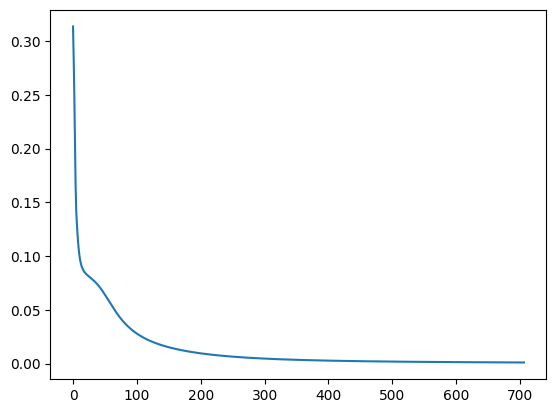

In [72]:
# print(x.transpose().shape)

mlp = mlp_2_layer(2,10,1,"tanh","sigmoid")
loss_list, epoch_list = mlp.gradient_descent_minibatch(x.transpose(),y,200,1000,0.01,threshold=0.001, batchsize=None, lr_decrease = 1)

y_predict = mlp.predict(mlp.feed_forward(x.transpose())[3])

plt.plot(epoch_list,loss_list)
print(mlp.w1,"weight of hidden layer")
print(mlp.w2,"weight of output layer")
print(mlp.b1,"bias of hidden layer")
print(mlp.b2,"bias of output layer")

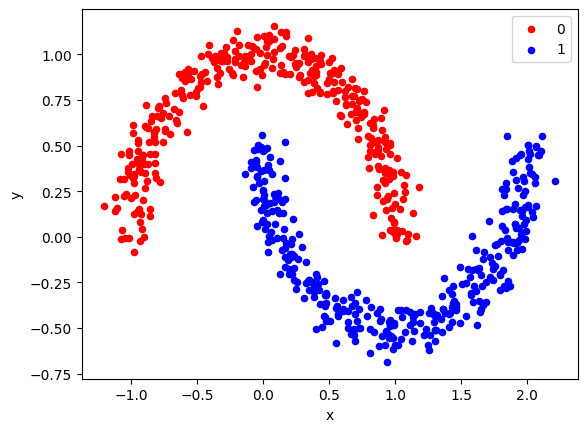

In [73]:
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

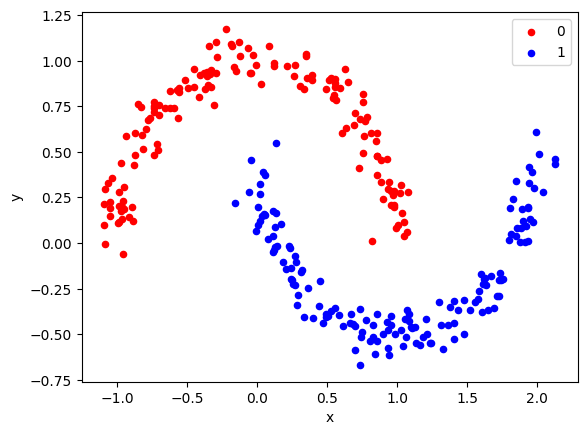

(50373, 2)
OverAll train Loss for all train data:  0.000999015359716122
OverAll train accuracy for all train data:  100.0
test Loss for all test data:  0.0007740285769026779
OverAll test accuracy for all train data:  100.0


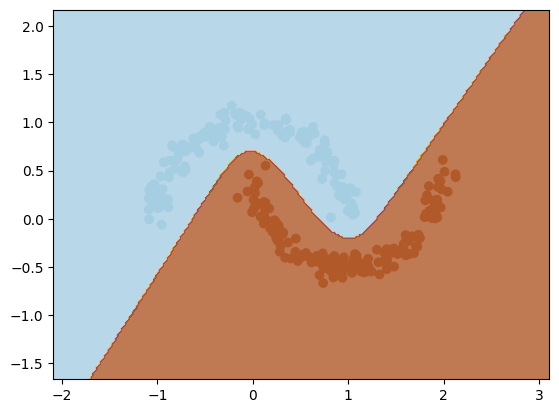

In [74]:
y_predict = mlp.predict(mlp.feed_forward(x_test.transpose())[3])

df = DataFrame(dict(x=x_test[:,0], y=x_test[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
 
decision_boundary(x_test,mlp,y_test)

print("OverAll train Loss for all train data: ",mlp.loss(mlp.feed_forward(x.transpose())[3],y))
print("OverAll train accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x.transpose())[3]),y))
print("test Loss for all test data: ",mlp.loss(mlp.feed_forward(x_test.transpose())[3],y_test))
print("OverAll test accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x_test.transpose())[3]),y_test))

 12%|█▏        | 116/1000 [00:00<00:01, 582.76it/s]

EPOCH:  0
loss:  0.42032121112106885
Accuracy:  49.857142857142854


 30%|███       | 303/1000 [00:00<00:01, 615.64it/s]

EPOCH:  200
loss:  0.08345291182085496
Accuracy:  87.71428571428571


 43%|████▎     | 434/1000 [00:00<00:00, 579.04it/s]

EPOCH:  400
loss:  0.06331153379399318
Accuracy:  91.28571428571428


 66%|██████▋   | 664/1000 [00:01<00:00, 472.41it/s]

EPOCH:  600
loss:  0.029741038050460418
Accuracy:  96.85714285714285


 92%|█████████▏| 920/1000 [00:01<00:00, 585.12it/s]

EPOCH:  800
loss:  0.018582051695387285
Accuracy:  99.28571428571429


100%|██████████| 1000/1000 [00:01<00:00, 530.99it/s]


[[ 0.99133798  0.95150327  7.56790479  1.01078091 -0.9736482  -0.9180208
  -0.91098288  0.99835801  0.97860837 -0.91511233]
 [-1.16012113 -1.02419275  1.9157123  -0.29019052  1.31359451  1.2555534
   1.19651425  0.18700511 -0.25761941  1.22825909]] weight of hidden layer
[[ 4.41955694]
 [ 3.76653915]
 [-9.42424338]
 [ 2.33976792]
 [-2.9706383 ]
 [-2.48347004]
 [-2.02991814]
 [ 1.65956421]
 [ 2.16840254]
 [-2.30282344]] weight of output layer
[[-0.58592475]
 [-0.3433438 ]
 [-4.08587306]
 [ 0.1363455 ]
 [-0.52361353]
 [-0.19552179]
 [-0.12525232]
 [ 0.02906123]
 [-0.03116334]
 [-0.15264155]] bias of hidden layer
[[1.45304237]] bias of output layer


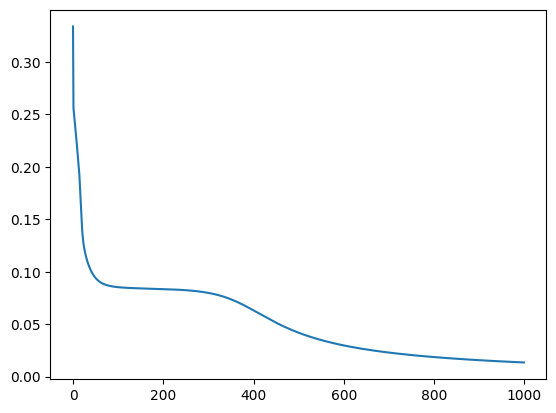

In [75]:
mlp = mlp_2_layer(2,10,1,"sigmoid","sigmoid")
loss_list,epoch_list = mlp.gradient_descent_minibatch(x.transpose(),y,200,1000,0.01,threshold=0.001, batchsize=None, lr_decrease = 1)


y_predict = mlp.predict(mlp.feed_forward(x.transpose())[3])

plt.plot(epoch_list,loss_list)
print(mlp.w1,"weight of hidden layer")
print(mlp.w2,"weight of output layer")
print(mlp.b1,"bias of hidden layer")
print(mlp.b2,"bias of output layer")

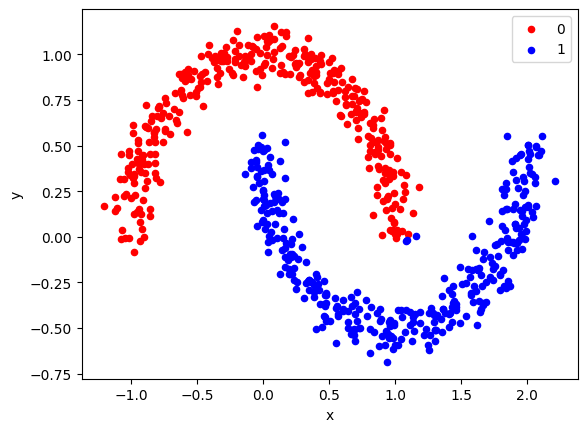

In [76]:
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

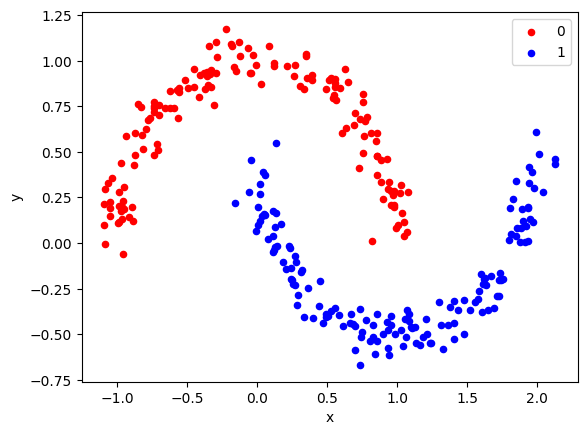

(50373, 2)
OverAll train Loss for all train data:  0.01339964069527229
OverAll train accuracy for all train data:  99.57142857142857
test Loss for all test data:  0.01040195524351686
OverAll test accuracy for all train data:  100.0


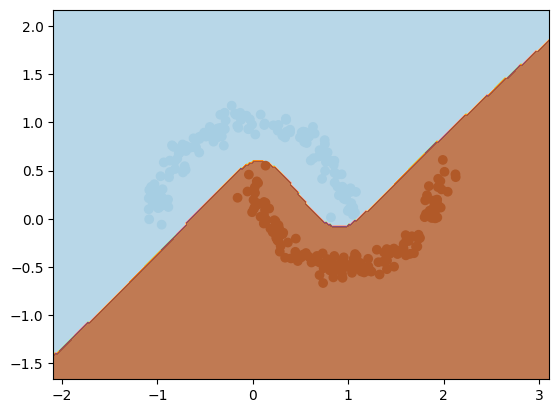

In [77]:
y_predict = mlp.predict(mlp.feed_forward(x_test.transpose())[3])

df = DataFrame(dict(x=x_test[:,0], y=x_test[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

decision_boundary(x_test,mlp,y_test)

print("OverAll train Loss for all train data: ",mlp.loss(mlp.feed_forward(x.transpose())[3],y))
print("OverAll train accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x.transpose())[3]),y))
print("test Loss for all test data: ",mlp.loss(mlp.feed_forward(x_test.transpose())[3],y_test))
print("OverAll test accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x_test.transpose())[3]),y_test))

  8%|▊         | 85/1000 [00:00<00:02, 423.53it/s]

EPOCH:  0
loss:  0.47215629532537556
Accuracy:  49.857142857142854


 25%|██▍       | 248/1000 [00:00<00:02, 364.42it/s]

EPOCH:  200
loss:  0.11221866393502551
Accuracy:  87.71428571428571


 49%|████▊     | 487/1000 [00:01<00:00, 560.72it/s]

EPOCH:  400
loss:  0.08671521640770165
Accuracy:  88.28571428571429


 69%|██████▉   | 688/1000 [00:01<00:00, 625.11it/s]

EPOCH:  600
loss:  0.06634075658894732
Accuracy:  91.85714285714286


 90%|█████████ | 904/1000 [00:01<00:00, 692.65it/s]

EPOCH:  800
loss:  0.039358740678614175
Accuracy:  97.28571428571429


100%|██████████| 1000/1000 [00:01<00:00, 531.44it/s]


[[-1.10096781  0.89838987 -0.12964444  0.22466205  0.90053734  0.82395628
   0.97032046  0.83972007  4.18540086  0.76741195]
 [ 0.99117759 -0.98823452  0.11186578  0.5450074  -0.94454421 -0.15824277
  -1.77429911 -0.25913895 -0.29392822 -0.26945216]] weight of hidden layer
[[-1.25284736]
 [ 1.28816713]
 [-0.16103727]
 [-0.02410137]
 [ 1.27267915]
 [ 0.62157803]
 [ 2.10798059]
 [ 0.71209699]
 [-2.99192223]
 [ 0.81249036]] weight of output layer
[[-0.84932704]
 [-0.68256789]
 [-0.92361814]
 [-1.156623  ]
 [-0.68790118]
 [-0.89497487]
 [-1.24890746]
 [-0.79613519]
 [-2.2993378 ]
 [-0.81942078]] bias of hidden layer
[[-0.01380384]] bias of output layer


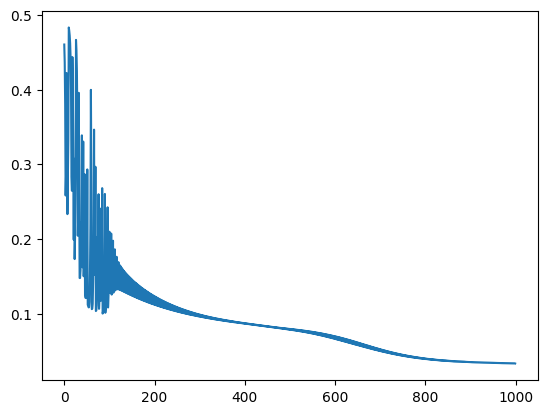

In [78]:
# print(x.transpose().shape)

mlp = mlp_2_layer(2,10,1,"sigmoid","tanh")
loss_list,epoch_list = mlp.gradient_descent_minibatch(x.transpose(),y,200,1000,0.0024,threshold=0.001, batchsize=None, lr_decrease = 1)


y_predict = mlp.predict(mlp.feed_forward(x.transpose())[3])

plt.plot(epoch_list,loss_list)
print(mlp.w1,"weight of hidden layer")
print(mlp.w2,"weight of output layer")
print(mlp.b1,"bias of hidden layer")
print(mlp.b2,"bias of output layer")

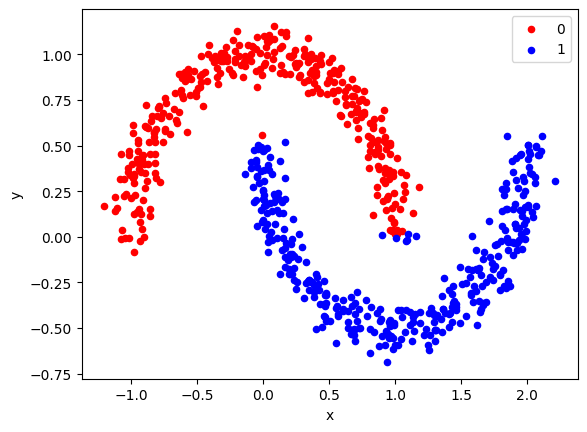

In [79]:
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

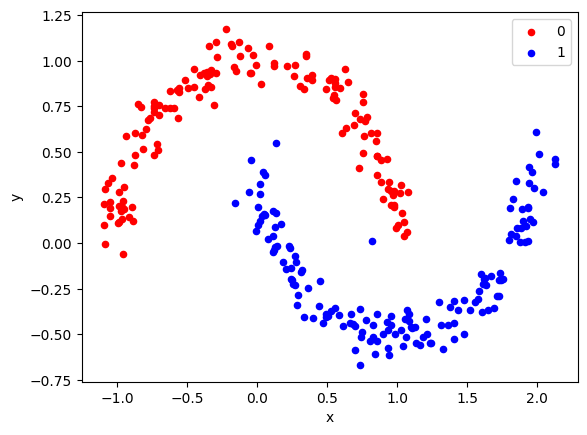

(50373, 2)
OverAll train Loss for all train data:  0.03334647582066255
OverAll train accuracy for all train data:  99.0
test Loss for all test data:  0.026962434078539477
OverAll test accuracy for all train data:  99.66666666666667


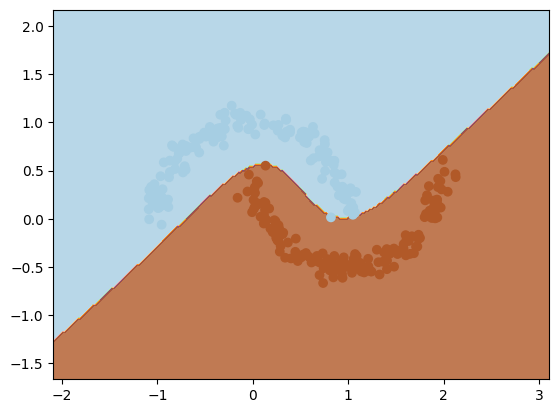

In [80]:
y_predict = mlp.predict(mlp.feed_forward(x_test.transpose())[3])

df = DataFrame(dict(x=x_test[:,0], y=x_test[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

decision_boundary(x_test,mlp,y_test)

print("OverAll train Loss for all train data: ",mlp.loss(mlp.feed_forward(x.transpose())[3],y))
print("OverAll train accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x.transpose())[3]),y))
print("test Loss for all test data: ",mlp.loss(mlp.feed_forward(x_test.transpose())[3],y_test))
print("OverAll test accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x_test.transpose())[3]),y_test))

  4%|▍         | 44/1000 [00:00<00:02, 430.28it/s]

EPOCH:  0
loss:  0.5201120720705249
Accuracy:  53.0


 29%|██▉       | 293/1000 [00:00<00:01, 504.25it/s]

EPOCH:  200
loss:  0.06744698708360684
Accuracy:  95.71428571428572


 44%|████▍     | 440/1000 [00:00<00:01, 449.07it/s]

EPOCH:  400
loss:  0.04558691280807033
Accuracy:  99.71428571428571


 69%|██████▉   | 692/1000 [00:01<00:00, 505.54it/s]

EPOCH:  600
loss:  0.04274543873920703
Accuracy:  98.85714285714286


 88%|████████▊ | 881/1000 [00:01<00:00, 591.53it/s]

EPOCH:  800
loss:  0.026222670528332596
Accuracy:  99.71428571428571


100%|██████████| 1000/1000 [00:01<00:00, 515.05it/s]


[[ 0.47026014  0.50049669  1.4869426   2.86406169  0.78595324  2.45469886
   0.32467053  0.58771584  2.89644045  0.54518299]
 [-0.09415172 -0.27923958 -1.02202296  2.11801568 -0.07208394 -0.40207663
  -0.00505548 -0.50791611 -0.36899658 -0.11365225]] weight of hidden layer
[[ 0.03226197]
 [ 0.03412535]
 [ 1.66661681]
 [-1.04114082]
 [ 0.05853793]
 [-0.37601326]
 [ 0.02477335]
 [ 0.04982185]
 [ 1.07910278]
 [ 0.03728891]] weight of output layer
[[ 0.09395851]
 [ 0.22792852]
 [-2.31289049]
 [-1.56679438]
 [ 0.09522592]
 [-1.41354059]
 [ 0.02325398]
 [ 0.40044485]
 [ 0.90503008]
 [ 0.11242031]] bias of hidden layer
[[1.51038998]] bias of output layer


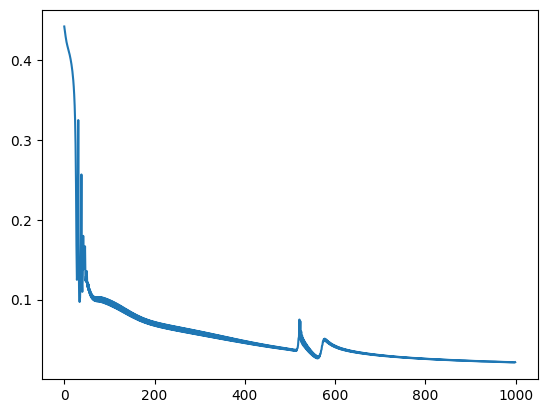

In [82]:
# print(x.transpose().shape)

mlp = mlp_2_layer(2,10,1,"tanh","tanh")
loss_list,epoch_list = mlp.gradient_descent_minibatch(x.transpose(),y,200,1000,0.0023,threshold=0.001, batchsize=None, lr_decrease = 1)


y_predict = mlp.predict(mlp.feed_forward(x.transpose())[3])

plt.plot(epoch_list,loss_list)
print(mlp.w1,"weight of hidden layer")
print(mlp.w2,"weight of output layer")
print(mlp.b1,"bias of hidden layer")
print(mlp.b2,"bias of output layer")

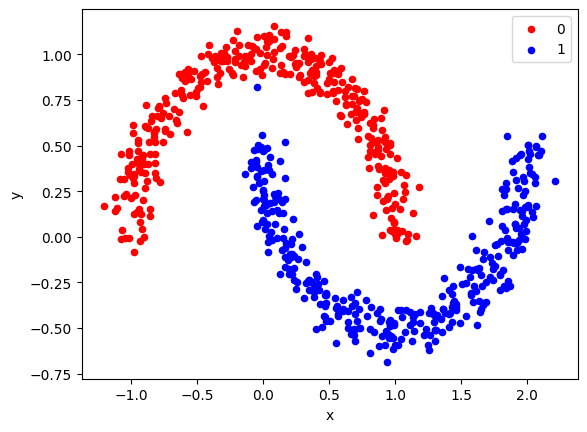

In [83]:
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

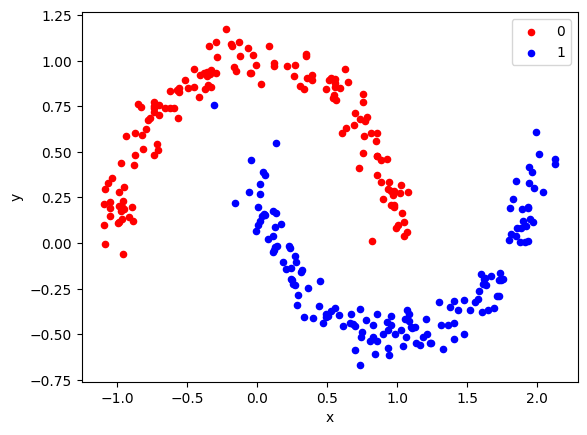

(50373, 2)
OverAll train Loss for all train data:  0.02165417775866132
OverAll train accuracy for all train data:  99.85714285714286
test Loss for all test data:  0.02140128149548583
OverAll test accuracy for all train data:  99.66666666666667


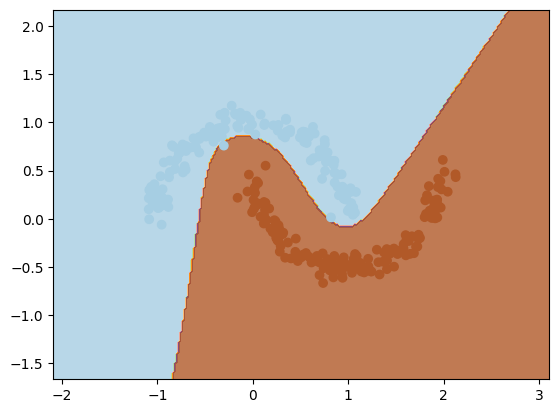

In [84]:
y_predict = mlp.predict(mlp.feed_forward(x_test.transpose())[3])

df = DataFrame(dict(x=x_test[:,0], y=x_test[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

decision_boundary(x_test,mlp,y_test)

print("OverAll train Loss for all train data: ",mlp.loss(mlp.feed_forward(x.transpose())[3],y))
print("OverAll train accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x.transpose())[3]),y))
print("test Loss for all test data: ",mlp.loss(mlp.feed_forward(x_test.transpose())[3],y_test))
print("OverAll test accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x_test.transpose())[3]),y_test))

  1%|          | 52/5000 [00:00<00:09, 511.55it/s]

EPOCH:  0
loss:  8.210419857676388
Accuracy:  49.857142857142854


 23%|██▎       | 1138/5000 [00:01<00:04, 881.66it/s]

EPOCH:  1000
loss:  0.08636120700088562
Accuracy:  87.42857142857143


 44%|████▍     | 2191/5000 [00:02<00:03, 935.79it/s]

EPOCH:  2000
loss:  0.03527998842278565
Accuracy:  96.28571428571429


 63%|██████▎   | 3136/5000 [00:03<00:02, 878.58it/s]

EPOCH:  3000
loss:  0.023331081299155777
Accuracy:  100.0


 82%|████████▏ | 4116/5000 [00:04<00:00, 887.09it/s]

EPOCH:  4000
loss:  0.023080613183717125
Accuracy:  100.0


100%|██████████| 5000/5000 [00:06<00:00, 826.12it/s]


[[-0.38138644  0.51263649  0.59485779  3.63328172  0.69664129  0.87171794
   0.42715339 -0.82211832  0.87572522  0.86720762]
 [ 0.76894146  0.3689196  -0.36695123 -0.21002684 -0.04212673 -0.65560514
   0.05848048  0.61710087 -0.65288538 -0.66311285]] weight of hidden layer
[[-0.68476317]
 [-0.00688651]
 [ 0.68125741]
 [-2.735275  ]
 [ 0.22572584]
 [ 1.52068013]
 [ 0.38543347]
 [-0.93237863]
 [ 1.50161976]
 [ 1.44879195]] weight of output layer
[[-0.70815049]
 [-0.67539222]
 [-0.58332265]
 [-1.71369383]
 [-0.64187369]
 [-0.2768053 ]
 [-0.71638625]
 [-0.58199676]
 [-0.33977365]
 [-0.34965687]] bias of hidden layer
[[-0.28752647]] bias of output layer


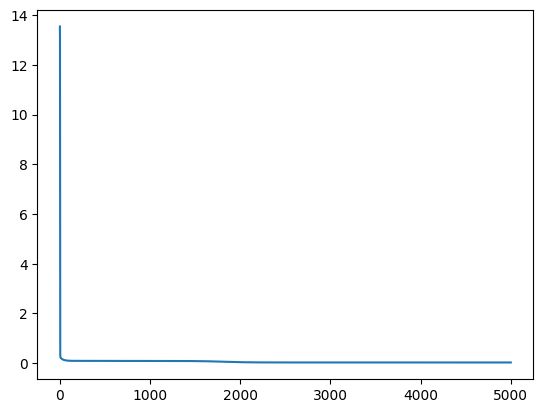

In [117]:
mlp = mlp_2_layer(2,10,1,"sigmoid","linear")
loss_list,epoch_list = mlp.gradient_descent_minibatch(x.transpose(),y,1000,5000,0.0007,threshold=0.001, batchsize=None, lr_decrease = 1)


y_predict = mlp.predict(mlp.feed_forward(x.transpose())[3])

plt.plot(epoch_list,loss_list)
print(mlp.w1,"weight of hidden layer")
print(mlp.w2,"weight of output layer")
print(mlp.b1,"bias of hidden layer")
print(mlp.b2,"bias of output layer")

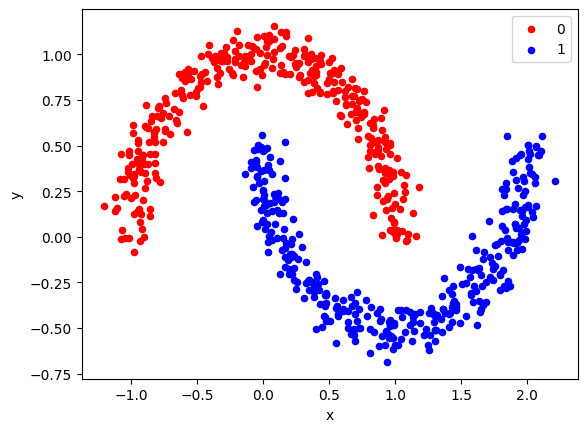

In [118]:
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

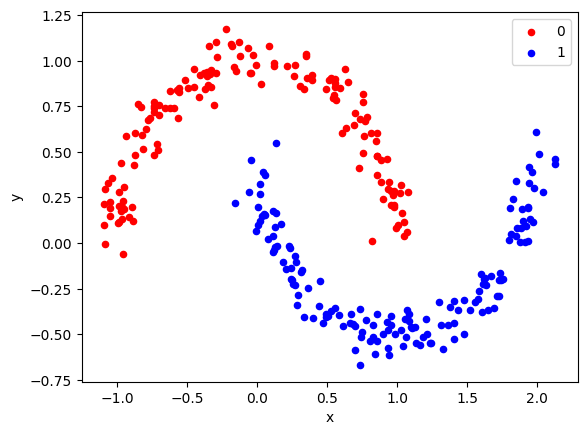

(50373, 2)
OverAll train Loss for all train data:  0.022910477120311034
OverAll train accuracy for all train data:  100.0
test Loss for all test data:  0.019137550220982767
OverAll test accuracy for all train data:  100.0


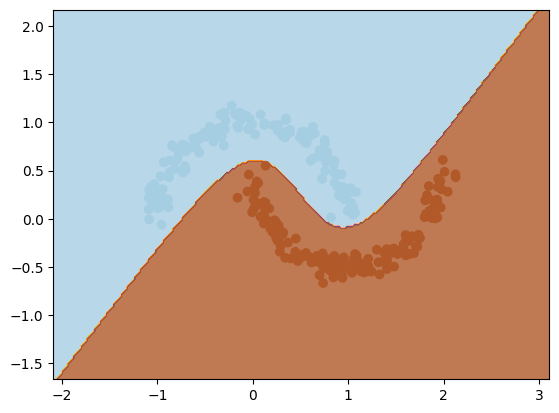

In [119]:
y_predict = mlp.predict(mlp.feed_forward(x_test.transpose())[3])

df = DataFrame(dict(x=x_test[:,0], y=x_test[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

decision_boundary(x_test,mlp,y_test)

print("OverAll train Loss for all train data: ",mlp.loss(mlp.feed_forward(x.transpose())[3],y))
print("OverAll train accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x.transpose())[3]),y))
print("test Loss for all test data: ",mlp.loss(mlp.feed_forward(x_test.transpose())[3],y_test))
print("OverAll test accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x_test.transpose())[3]),y_test))

  6%|▋         | 63/1000 [00:00<00:01, 625.04it/s]

EPOCH:  0
loss:  3.234156098070774
Accuracy:  47.85714285714286


 38%|███▊      | 378/1000 [00:00<00:00, 785.01it/s]

EPOCH:  200
loss:  0.057972704384509514
Accuracy:  91.71428571428571


 54%|█████▍    | 540/1000 [00:00<00:00, 775.37it/s]

EPOCH:  400
loss:  0.027746470860367956
Accuracy:  99.14285714285714


 71%|███████   | 712/1000 [00:00<00:00, 819.21it/s]

EPOCH:  600
loss:  0.02469835578879464
Accuracy:  99.57142857142857
EPOCH:  800
loss:  0.02377144824256323
Accuracy:  99.85714285714286


100%|██████████| 1000/1000 [00:01<00:00, 813.39it/s]


[[ 0.44780233 -0.42155801  0.57009991 -0.44819123  1.99936935 -0.40149561
  -0.29650358 -0.2896656   0.28503119 -0.23634949]
 [-0.28121296  0.23171653  0.55130496  0.30243516 -0.0780076   0.3458085
   0.43272753  0.29538758  0.52299028  0.15431318]] weight of hidden layer
[[ 0.43282809]
 [-0.52097289]
 [-0.02083473]
 [-0.62004319]
 [-1.19931403]
 [-0.58806501]
 [-0.48950817]
 [-0.39289407]
 [ 0.03353675]
 [-0.26901813]] weight of output layer
[[-0.06860679]
 [ 0.10006213]
 [ 0.12726221]
 [ 0.07629078]
 [-0.90192844]
 [-0.00712855]
 [-0.05521454]
 [-0.12187526]
 [-0.47075881]
 [-0.00507595]] bias of hidden layer
[[0.2747059]] bias of output layer


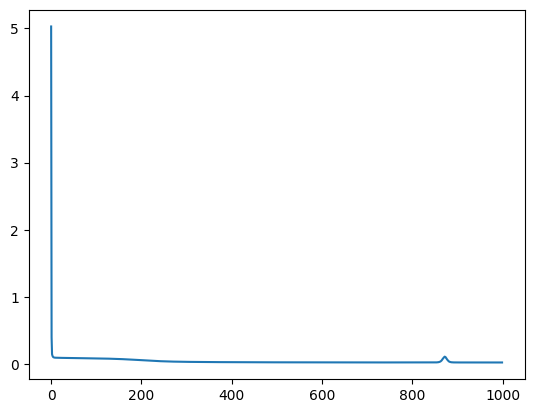

In [113]:
mlp = mlp_2_layer(2,10,1,"tanh","linear")
loss_list,epoch_list = mlp.gradient_descent_minibatch(x.transpose(),y,200,1000,0.001,threshold=0.001, batchsize=None, lr_decrease = 0.8)


y_predict = mlp.predict(mlp.feed_forward(x.transpose())[3])

plt.plot(epoch_list,loss_list)
print(mlp.w1,"weight of hidden layer")
print(mlp.w2,"weight of output layer")
print(mlp.b1,"bias of hidden layer")
print(mlp.b2,"bias of output layer")

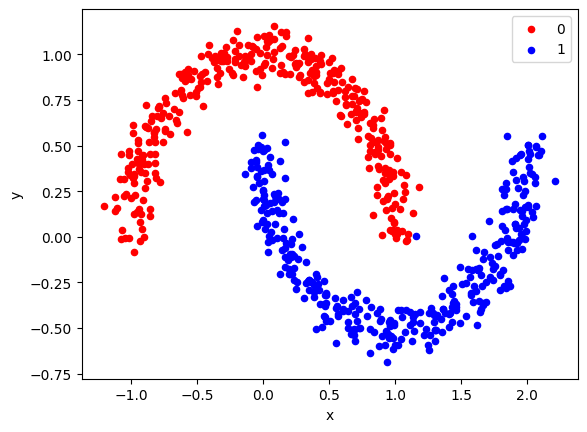

In [114]:
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

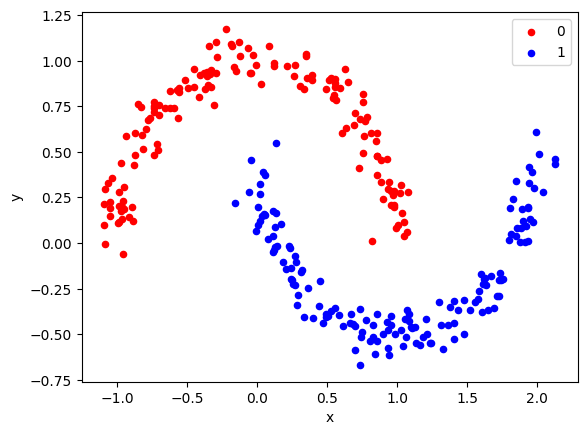

(50373, 2)
OverAll train Loss for all train data:  0.023384561038141023
OverAll train accuracy for all train data:  99.85714285714286
test Loss for all test data:  0.01992720731503467
OverAll test accuracy for all train data:  100.0


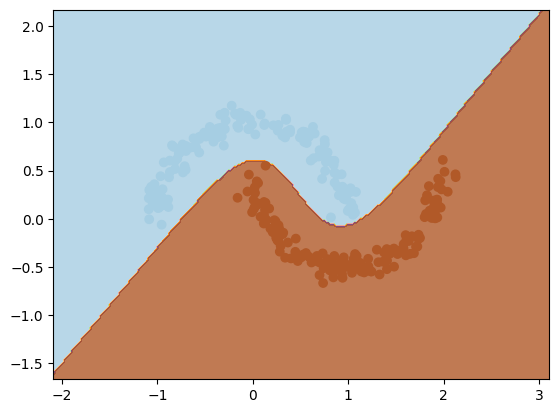

In [115]:
y_predict = mlp.predict(mlp.feed_forward(x_test.transpose())[3])

df = DataFrame(dict(x=x_test[:,0], y=x_test[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

decision_boundary(x_test,mlp,y_test)

print("OverAll train Loss for all train data: ",mlp.loss(mlp.feed_forward(x.transpose())[3],y))
print("OverAll train accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x.transpose())[3]),y))
print("test Loss for all test data: ",mlp.loss(mlp.feed_forward(x_test.transpose())[3],y_test))
print("OverAll test accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x_test.transpose())[3]),y_test))

  2%|▏         | 20/1000 [00:00<00:05, 192.11it/s]

EPOCH:  0
loss:  0.514091616897348
Accuracy:  50.0


 24%|██▎       | 237/1000 [00:01<00:02, 254.65it/s]

EPOCH:  200
loss:  0.026806667343956914
Accuracy:  98.33333333333333


 44%|████▍     | 441/1000 [00:01<00:01, 335.52it/s]

EPOCH:  400
loss:  0.0246444263600655
Accuracy:  100.0


 62%|██████▏   | 622/1000 [00:02<00:01, 340.33it/s]

EPOCH:  600
loss:  0.02205982247504586
Accuracy:  100.0


 84%|████████▎ | 836/1000 [00:02<00:00, 349.34it/s]

EPOCH:  800
loss:  0.017611427290329107
Accuracy:  100.0


100%|██████████| 1000/1000 [00:03<00:00, 301.27it/s]


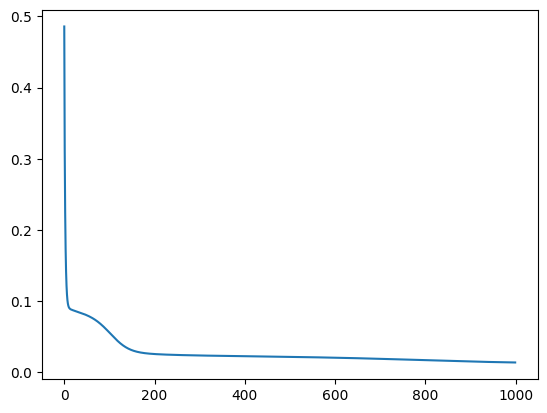

In [94]:
mlp = mlp_2_layer(2,10,1,"tanh","linear")
loss_list,epoch_list = mlp.gradient_descent_minibatch(x.transpose(),y,200,1000,0.001,threshold=0.001, batchsize=64, lr_decrease = 1)


y_predict = mlp.predict(mlp.feed_forward(x.transpose())[3])

plt.plot(epoch_list,loss_list)

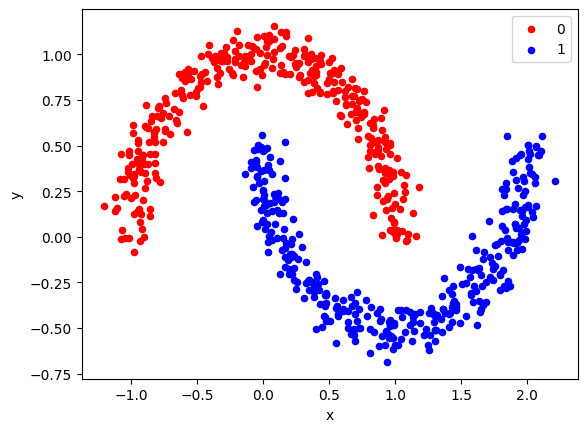

In [95]:
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

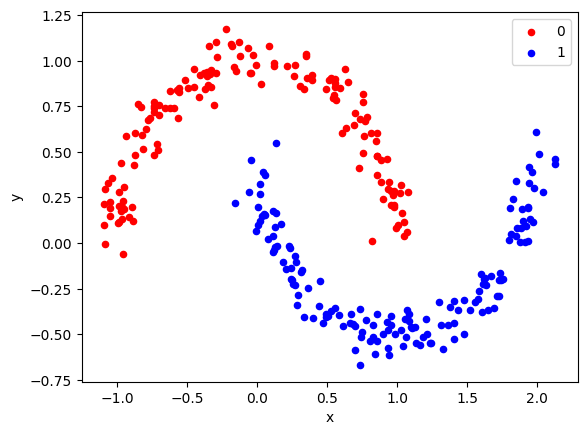

(50373, 2)
OverAll train Loss for all train data:  0.014000602728050676
OverAll train accuracy for all train data:  100.0
test Loss for all test data:  0.0108685086203736
OverAll test accuracy for all train data:  100.0


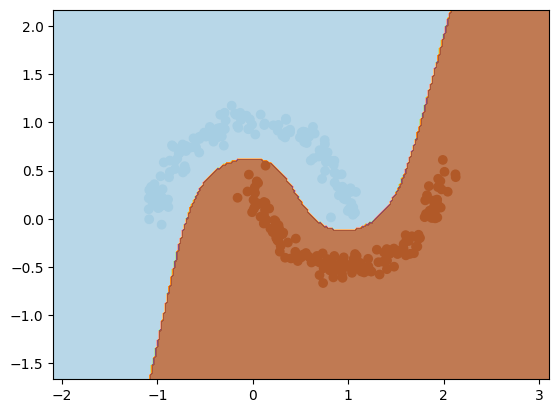

In [96]:
y_predict = mlp.predict(mlp.feed_forward(x_test.transpose())[3])

df = DataFrame(dict(x=x_test[:,0], y=x_test[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

decision_boundary(x_test,mlp,y_test)

print("OverAll train Loss for all train data: ",mlp.loss(mlp.feed_forward(x.transpose())[3],y))
print("OverAll train accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x.transpose())[3]),y))
print("test Loss for all test data: ",mlp.loss(mlp.feed_forward(x_test.transpose())[3],y_test))
print("OverAll test accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x_test.transpose())[3]),y_test))

  0%|          | 2/1000 [00:00<03:26,  4.83it/s]

EPOCH:  0
loss:  0.03508629700881765
Accuracy:  100.0


 20%|██        | 201/1000 [00:29<01:50,  7.26it/s]

EPOCH:  200
loss:  0.06500001255319267
Accuracy:  100.0


 40%|████      | 402/1000 [00:58<01:22,  7.28it/s]

EPOCH:  400
loss:  0.06299567902488315
Accuracy:  100.0


 60%|██████    | 602/1000 [01:25<00:50,  7.85it/s]

EPOCH:  600
loss:  0.050052036579572544
Accuracy:  100.0


 80%|████████  | 802/1000 [01:50<00:24,  8.17it/s]

EPOCH:  800
loss:  0.03482056928659275
Accuracy:  100.0


100%|██████████| 1000/1000 [02:17<00:00,  7.27it/s]


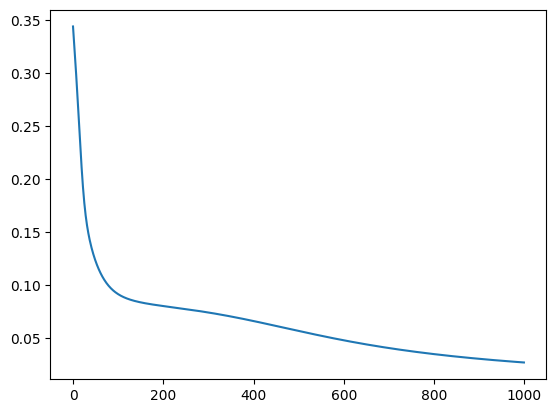

In [97]:
mlp = mlp_2_layer(2,10,1,"tanh","sigmoid")
loss_list,epoch_list = mlp.gradient_descent_minibatch(x.transpose(),y,200,1000,0.001,threshold=0.01, batchsize=1, lr_decrease = 0.9)


y_predict = mlp.predict(mlp.feed_forward(x.transpose())[3])

plt.plot(epoch_list,loss_list)
print(mlp.w1,"weight of hidden layer")
print(mlp.w2,"weight of output layer")
print(mlp.b1,"bias of hidden layer")
print(mlp.b2,"bias of output layer")

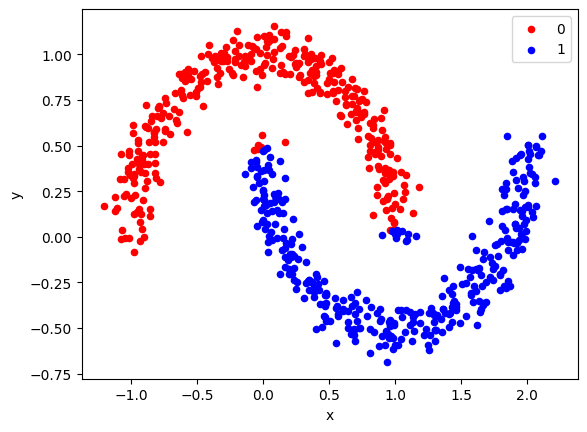

In [99]:
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

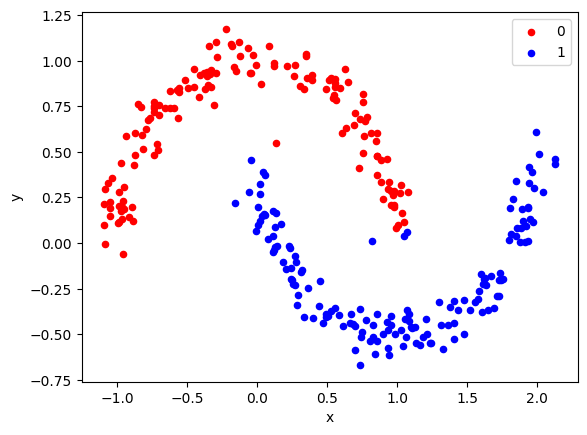

(50373, 2)
OverAll train Loss for all train data:  0.027142123207221272
OverAll train accuracy for all train data:  97.57142857142857
test Loss for all test data:  0.0219343116112761
OverAll test accuracy for all train data:  98.66666666666667


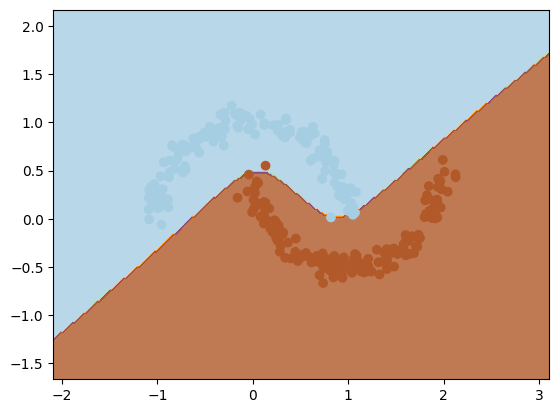

In [100]:
y_predict = mlp.predict(mlp.feed_forward(x_test.transpose())[3])

df = DataFrame(dict(x=x_test[:,0], y=x_test[:,1], label=y_predict.reshape(y_predict.size)))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

decision_boundary(x_test,mlp,y_test)

print("OverAll train Loss for all train data: ",mlp.loss(mlp.feed_forward(x.transpose())[3],y))
print("OverAll train accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x.transpose())[3]),y))
print("test Loss for all test data: ",mlp.loss(mlp.feed_forward(x_test.transpose())[3],y_test))
print("OverAll test accuracy for all train data: ",mlp.accuracy(mlp.predict(mlp.feed_forward(x_test.transpose())[3]),y_test))